In [1]:
import pandas as pd
import datetime as dt

In [2]:
df = pd.read_csv("Walmart.xlsx - Walmart.csv")

### 1. Which product categories contribute the most to the company's profit margin?
### Are there any underperforming categories that need attention?

In [5]:
x  = df.groupby("Category").Profit.sum()

In [6]:
profit_margin_data = pd.DataFrame(x)

##### positive sale margin products

In [7]:
positive = profit_margin_data[profit_margin_data.Profit>0]
positive.Profit.sort_values(ascending = False)

Category
Copiers        19327.25
Accessories    16484.62
Binders        16096.78
Paper          12119.10
Phones          9111.06
Storage         8645.49
Appliances      8261.29
Furnishings     7641.26
Chairs          4027.62
Art             2374.15
Labels          2303.07
Envelopes       1908.71
Tables          1482.54
Supplies         626.11
Fasteners        275.19
Name: Profit, dtype: float64

#### Negative sales products

In [8]:
negative = profit_margin_data[profit_margin_data["Profit"]<0]
negative.Profit.sort_values()

Category
Bookcases   -1646.50
Machines     -618.95
Name: Profit, dtype: float64

#### 2. Can you identify the top 10% of customers who contribute the most to the overall
#### sales revenue? What are their common characteristics?

In [9]:
ten_perc = df[df.Sales>0]
ten_perc.Sales.sort_values(ascending = False)

2663    13999.96
799      8187.65
2846     5083.96
1913     4912.59
1319     4799.98
          ...   
2309        1.34
1995        1.19
295         1.08
1576        1.08
879         0.99
Name: Sales, Length: 3203, dtype: float64

#### Top 10% most valued customers

In [60]:
valued_cust = df[df.Sales>0].sort_values(by="Sales",ascending = False).head(int((10*3203)/100))

In [59]:
# valued_cust.groupby(["Category","Product Name"])["Profit"].head(40)
new_df = valued_cust.groupby(["Category", "Product Name"]).agg({"Profit": "sum"}).reset_index()
new_df = pd.DataFrame(new_df)

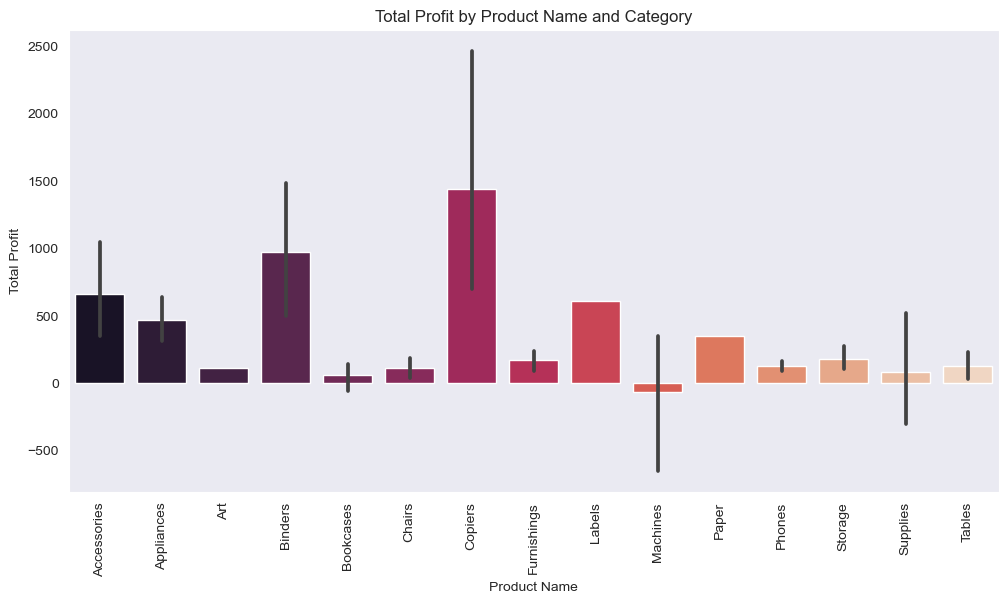

In [25]:
sns.set_style("dark")
plt.figure(figsize=(12, 6))
sns.barplot(data=new_df, x="Category", y="Profit", palette="rocket")
plt.xticks(rotation=90)
plt.xlabel("Product Name")
plt.ylabel("Total Profit")
plt.title("Total Profit by Product Name and Category")

plt.show()

#### 3. How does the total sales revenue vary over time? Provide a monthly trend
#### analysis for the entire dataset.

In [3]:
df['Order Date'] = pd.to_datetime(df["Order Date"], errors = "coerce", format = "%m/%d/%Y")

In [4]:
df["month"] = df["Order Date"].dt.month

In [5]:
df["year"] = df["Order Date"].dt.year

In [36]:
data = df.groupby(["year", "month"])[["Sales","Profit"]].sum().reset_index()
data.columns

Index(['year', 'month', 'Sales', 'Profit'], dtype='object')

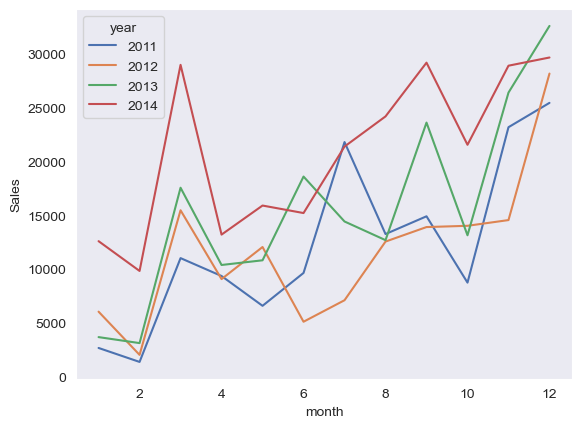

In [40]:
sns.lineplot(x=data.month,y=data.Sales,hue = data.year ,palette="deep")
plt.show()

 #### 4. What are the top 5 cities in terms of total sales revenue? Is there any correlation
 #### between the population size of a city and its contribution to sales?

In [6]:
df

,Order ID,Order Date,Ship Date,Customer Name,Country,City,State,Category,Product Name,Sales,Quantity,Profit,month,year
0,CA-2013-138688,2013-06-13,6/17/2013,Darrin Van Huff,United States,Los Angeles,California,Labels,Self-Adhesive Address Labels for Typewriters b...,14.62,2.0,6.87,6,2013
1,CA-2011-115812,2011-06-09,6/14/2011,Brosina Hoffman,United States,Los Angeles,California,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.86,7.0,14.17,6,2011
2,CA-2011-115812,2011-06-09,6/14/2011,Brosina Hoffman,United States,Los Angeles,California,Art,Newell 322,7.28,4.0,1.97,6,2011
3,CA-2011-115812,2011-06-09,6/14/2011,Brosina Hoffman,United States,Los Angeles,California,Phones,Mitel 5320 IP Phone VoIP phone,907.15,4.0,90.72,6,2011
4,CA-2011-115812,2011-06-09,6/14/2011,Brosina Hoffman,United States,Los Angeles,California,Binders,DXL Angle-View Binders with Locking Rings by S...,18.50,3.0,5.78,6,2011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3198,CA-2013-125794,2013-09-30,10/4/2013,Maris LaWare,United States,Los Angeles,California,Accessories,Memorex Mini Travel Drive 64 GB USB 2.0 Flash ...,36.24,1.0,15.22,9,2013
3199,CA-2014-121258,2014-02-27,3/4/2014,Dave Brooks,United States,Costa Mesa,California,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.96,2.0,15.63,2,2014
3200,CA-2014-121258,2014-02-27,3/4/2014,Dave Brooks,United States,Costa Mesa,California,Phones,Aastra 57i VoIP phone,258.58,2.0,19.39,2,2014
3201,CA-2014-121258,2014-02-27,3/4/2014,Dave Brooks,United States,Costa Mesa,California,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.60,4.0,13.32,2,2014


In [45]:
data1 = df.groupby(["City"]).agg({'Sales':'sum', 'Customer Name':'nunique'}).sort_values(by="Sales",ascending=False).reset_index().head(5)

<Axes: xlabel='Customer Name', ylabel='Sales'>

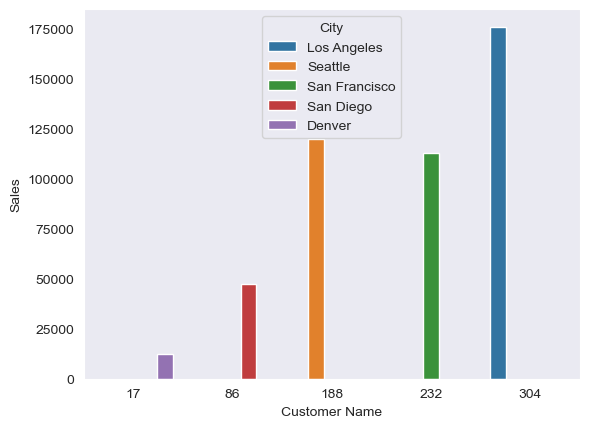

In [53]:
sns.barplot(x=data1["Customer Name"],y=data1.Sales,hue=data1.City)


#### 5. Calculate the average time taken to fulfill an order (from order date to ship date).
#### Are there any trends or patterns indicating potential delays in order processing?

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3203 entries, 0 to 3202
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Order ID       3203 non-null   object        
 1   Order Date     3203 non-null   datetime64[ns]
 2   Ship Date      3203 non-null   datetime64[ns]
 3   Customer Name  3203 non-null   object        
 4   Country        3203 non-null   object        
 5   City           3203 non-null   object        
 6   State          3203 non-null   object        
 7   Category       3203 non-null   object        
 8   Product Name   3203 non-null   object        
 9   Sales          3203 non-null   float64       
 10  Quantity       3203 non-null   float64       
 11  Profit         3203 non-null   float64       
 12  month          3203 non-null   int32         
 13  year           3203 non-null   int32         
dtypes: datetime64[ns](2), float64(3), int32(2), object(7)
memory usage: 325.

In [7]:
df['Ship Date'] = pd.to_datetime(df["Ship Date"], errors = "coerce", format = "%m/%d/%Y")

In [8]:
df['Order Date'] = pd.to_datetime(df["Order Date"], errors = "coerce", format = "%m/%d/%Y")
# df["days"] = df["Ship Date"] - df["Order Date"]

In [9]:
df["days"] = df["Ship Date"] - df["Order Date"]

In [10]:
df.days.mean()

Timedelta('3 days 22:19:17.664689353')

In [65]:
data2 = df.groupby(["City","days","Category"]).agg({"Quantity":"sum"}).reset_index()

C:\Users\Rohan verma\AppData\Local\Temp\ipykernel_6712\1584465488.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x=data2.Category,y=data2.days,ci = None,markers = "*")


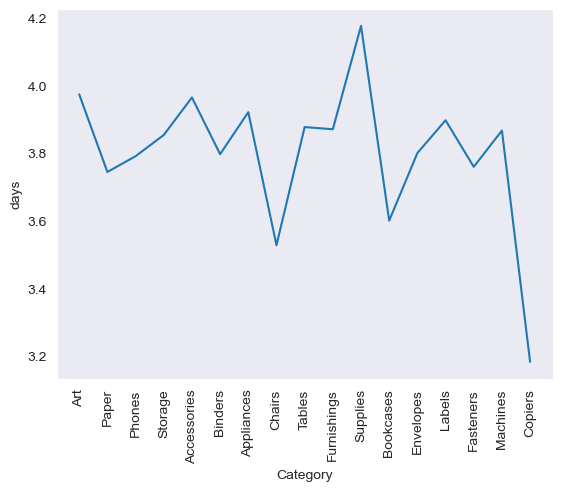

In [88]:
# data2['days'] = data2['days'].apply(lambda x: x.days)
data2.columns
sns.lineplot(x=data2.Category,y=data2.days,ci = None,markers = "*")
plt.xticks(rotation = 90)
plt.show()

#### 6. Compare the profitability of each product. Identify the top 10 most profitable
#### products and their corresponding categories.

In [11]:
df

,Order ID,Order Date,Ship Date,Customer Name,Country,City,State,Category,Product Name,Sales,Quantity,Profit,month,year,days
0,CA-2013-138688,2013-06-13,2013-06-17,Darrin Van Huff,United States,Los Angeles,California,Labels,Self-Adhesive Address Labels for Typewriters b...,14.62,2.0,6.87,6,2013,4 days
1,CA-2011-115812,2011-06-09,2011-06-14,Brosina Hoffman,United States,Los Angeles,California,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.86,7.0,14.17,6,2011,5 days
2,CA-2011-115812,2011-06-09,2011-06-14,Brosina Hoffman,United States,Los Angeles,California,Art,Newell 322,7.28,4.0,1.97,6,2011,5 days
3,CA-2011-115812,2011-06-09,2011-06-14,Brosina Hoffman,United States,Los Angeles,California,Phones,Mitel 5320 IP Phone VoIP phone,907.15,4.0,90.72,6,2011,5 days
4,CA-2011-115812,2011-06-09,2011-06-14,Brosina Hoffman,United States,Los Angeles,California,Binders,DXL Angle-View Binders with Locking Rings by S...,18.50,3.0,5.78,6,2011,5 days
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3198,CA-2013-125794,2013-09-30,2013-10-04,Maris LaWare,United States,Los Angeles,California,Accessories,Memorex Mini Travel Drive 64 GB USB 2.0 Flash ...,36.24,1.0,15.22,9,2013,4 days
3199,CA-2014-121258,2014-02-27,2014-03-04,Dave Brooks,United States,Costa Mesa,California,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.96,2.0,15.63,2,2014,5 days
3200,CA-2014-121258,2014-02-27,2014-03-04,Dave Brooks,United States,Costa Mesa,California,Phones,Aastra 57i VoIP phone,258.58,2.0,19.39,2,2014,5 days
3201,CA-2014-121258,2014-02-27,2014-03-04,Dave Brooks,United States,Costa Mesa,California,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.60,4.0,13.32,2,2014,5 days


In [336]:
df.groupby(["Category","Product Name"]).agg({"Quantity":"count","Profit":"sum","Category":"value_counts"}).sort_values(by = "Profit",ascending=False).head(10)

Quantity  \
Category    Product Name                                                   
Copiers     Canon imageCLASS 2200 Advanced Copier                      1   
Binders     Fellowes PB500 Electric Punch Plastic Comb Bind...         3   
Copiers     Canon PC1060 Personal Laser Copier                         3   
            Hewlett Packard LaserJet 3310 Copier                       3   
Accessories LogitechÂ Z-906 Speaker sys - home theater - 5....         3   
            Plantronics Savi W720 Multi-Device Wireless Hea...         3   
Binders     Ibico EPK-21 Electric Binding System                       1   
Copiers     Canon PC940 Copier                                         1   
Accessories LogitechÂ P710e Mobile Speakerphone                        5   
Copiers     Canon Image Class D660 Copier                              1   

                                                                 Profit  \
Category    Product Name                                                  
Copiers     Canon imageCLASS 2200 Advanced Copier               6719.98   
Binders     Fellowes PB500 Electric Punch Plastic Comb Bind...  3050.38   
Copiers     Canon PC1060 Personal Laser Copier                  2267.97   
            Hewlett Packard LaserJet 3310 Copier                2183.96   
Accessories LogitechÂ Z-906 Speaker sys - home theater - 5....  1715.95   
            Plantronics Savi W720 Multi-Device Wireless Hea...  1670.92   
Binders     Ibico EPK-21 Electric Binding System                1644.29   
Copiers     Canon PC940 Copier                                  1480.47   
Accessories LogitechÂ P710e Mobile Speakerphone                 1418.78   
Copiers     Canon Image Class D660 Copier                       1379.98   

                                                                Category  
Category    Product Name                                                  
Copiers     Canon imageCLASS 2200 Advanced Copier                      1  
Binders     Fellowes PB500 Electric Punch Plastic Comb Bind...         3  
Copiers     Canon PC1060 Personal Laser Copier                         3  
            Hewlett Packard LaserJet 3310 Copier                       3  
Accessories LogitechÂ Z-906 Speaker sys - home theater - 5....         3  
            Plantronics Savi W720 Multi-Device Wireless Hea...         3  
Binders     Ibico EPK-21 Electric Binding System                       1  
Copiers     Canon PC940 Copier                                         1  
Accessories LogitechÂ P710e Mobile Speakerphone                        5  
Copiers     Canon Image Class D660 Copier                              1

In [335]:
df.groupby("Category")["Profit"].sum().sort_values(ascending=False)

Category
Copiers        19327.25
Accessories    16484.62
Binders        16096.78
Paper          12119.10
Phones          9111.06
Storage         8645.49
Appliances      8261.29
Furnishings     7641.26
Chairs          4027.62
Art             2374.15
Labels          2303.07
Envelopes       1908.71
Tables          1482.54
Supplies         626.11
Fasteners        275.19
Machines        -618.95
Bookcases      -1646.50
Name: Profit, dtype: float64

#### 7. Can you estimate the Customer Lifetime Value (CLV): for each customer based
#### on their past purchasing behavior? How would you interpret and utilize this
#### information for targeted marketing strategies?

In [90]:
df.groupby(["Customer Name"])["Customer Name"].count().sort_values(ascending=False).reset_index()

Customer Name
William Brown        24
Arthur Prichep       23
Rick Wilson          19
Greg Guthrie         17
Zuschuss Carroll     16
Darrin Sayre         16
Arianne Irving       15
Edward Hooks         15
Lena Cacioppo        15
Ruben Dartt          15
Sanjit Chand         15
Lena Creighton       15
Clay Ludtke          15
Sally Hughsby        15
Damala Kotsonis      14
Laurel Beltran       14
Keith Herrera        14
Steven Cartwright    14
Dennis Kane          13
Logan Haushalter     13
Name: year, dtype: int64

In [352]:
df[df["Customer Name"]=="Edward Hooks"]

,Order ID,Order Date,Ship Date,Customer Name,Country,City,State,Category,Product Name,Sales,Quantity,Profit,days,month,year
1562,CA-2013-135776,2013-12-24,2013-12-31,Edward Hooks,United States,Seattle,Washington,Art,Newell 317,8.82,3.0,2.56,7 days,12,2013
1563,CA-2013-135776,2013-12-24,2013-12-31,Edward Hooks,United States,Seattle,Washington,Paper,Computer Printout Paper with Letter-Trim Perfo...,37.94,2.0,18.21,7 days,12,2013
1564,CA-2013-135776,2013-12-24,2013-12-31,Edward Hooks,United States,Seattle,Washington,Art,"Sanford EarthWrite Recycled Pencils, Medium So...",4.20,2.0,1.18,7 days,12,2013
1565,CA-2013-135776,2013-12-24,2013-12-31,Edward Hooks,United States,Seattle,Washington,Storage,SAFCO Boltless Steel Shelving,227.28,2.0,2.27,7 days,12,2013
1566,CA-2013-135776,2013-12-24,2013-12-31,Edward Hooks,United States,Seattle,Washington,Paper,Xerox 1911,47.90,1.0,22.99,7 days,12,2013
1567,CA-2013-135776,2013-12-24,2013-12-31,Edward Hooks,United States,Seattle,Washington,Envelopes,Staples,61.96,2.0,30.36,7 days,12,2013
1568,CA-2013-135776,2013-12-24,2013-12-31,Edward Hooks,United States,Seattle,Washington,Storage,"Tennsco Snap-Together Open Shelving Units, Sta...",1117.92,4.0,55.90,7 days,12,2013
1912,CA-2013-136301,2013-03-14,2013-03-16,Edward Hooks,United States,San Francisco,California,Furnishings,Westinghouse Mesh Shade Clip-On Gooseneck Lamp...,28.28,2.0,7.35,2 days,3,2013
1913,CA-2013-136301,2013-03-14,2013-03-16,Edward Hooks,United States,San Francisco,California,Supplies,High Speed Automatic Electric Letter Opener,4912.59,3.0,196.50,2 days,3,2013
2053,CA-2013-100944,2013-09-25,2013-09-29,Edward Hooks,United States,Los Angeles,California,Envelopes,"Tyvek Interoffice Envelopes, 9 1/2"" x 12 1/2"",...",304.90,5.0,143.30,4 days,9,2013


####  8. Analyze the seasonal variations in sales. Are there any specific months or
#### quarters where sales tend to spike or drop significantly? What factors might
#### influence these fluctuations?

In [379]:
datanew = df.groupby(["month","year"])["Profit"].sum()

In [380]:
data = pd.DataFrame(datanew)

In [381]:
data.describe()

,Profit
count,48.000000
mean,2258.724792
std,1848.126488
min,-1867.730000
25%,1173.950000
50%,1775.155000
75%,3251.717500
max,9107.000000


In [384]:
data

Profit
month year         
1     2011    20.97
      2012   600.30
      2013   644.23
      2014  3300.04
2     2011   228.82
      2012   434.15
      2013   388.42
      2014  1648.26
3     2011  1534.24
      2012  4243.40
      2013  1210.21
      2014  9107.00
4     2011  1629.45
      2012  1332.82
      2013   334.39
      2014 -1867.73
5     2011   873.57
      2012  1641.14
      2013  1506.68
      2014  2779.11
6     2011  1771.84
      2012  1034.33
      2013  2275.41
      2014  2648.41
7     2011  1946.69
      2012    24.26
      2013  2978.70
      2014  4333.16
8     2011  2560.85
      2012  1238.99
      2013  1249.65
      2014  6028.16
9     2011  3075.50
      2012  2451.18
      2013  4276.38
      2014  4891.81
10    2011  1391.28
      2012  1778.47
      2013  1065.17
      2014  3420.17
11    2011  3151.34
      2012  1750.17
      2013  4795.05
      2014  3433.71
12    2011  1881.19
      2012  3962.96
      2013  3235.61
      2014  4178.88